In [65]:
# here we will impor the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline

from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split,GridSearchCV  # to split the data into two parts
from sklearn.model_selection import KFold, cross_val_score  # use for K- fold cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score,average_precision_score, precision_score, confusion_matrix, classification_report

In [66]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  #
import seaborn as sns  #
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [67]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.datasets import make_hastie_10_2

In [68]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,confusion_matrix, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [86]:
dataset = pd.read_csv('data.csv')
dataset.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [87]:
print('This dataset contains ',dataset.shape[0],'rows')
print('This dataset contains ',dataset.shape[1],'columns')

This dataset contains  569 rows
This dataset contains  33 columns


In [88]:
# Creating a Binary Target Column to allow us to do Later Modelling and Plotting

dataset['Target'] = dataset['diagnosis'].map({'B':0, 'M':1})

In [89]:

# Drop the ID Column as it seems irrelevant 

dataset=dataset.drop(['id','Unnamed: 32'], axis=1)
dataset.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Target'],
      dtype='object')

In [90]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

In [91]:
dataset.diagnosis.unique()

array(['M', 'B'], dtype=object)

#### Checking the Class Distribution

In [92]:
dataset['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [99]:
X_train = dataset.drop(['diagnosis', 'Target'] ,axis=1)
y= dataset['Target']

### Feature Scaling

In [101]:
# Scaling of the Variables

sc = StandardScaler()
scaled_X = sc.fit_transform(X_train.values)
pd.DataFrame(scaled_X, columns=X_train.columns).head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


## Normalization of the Dataset 

In [104]:
# Normalization of the X_Train Set

normalized_data= (X_train -np.min(X_train))/(np.max(X_train)-np.min(X_train)).values

### Encoding the Target Variable Y

In [103]:
# Encode the target variable Y

le = LabelEncoder()
y = le.fit_transform(y)
pd.DataFrame(y, columns=['diagnosis']).head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


In [93]:
# Fitting a Label Binarizer
# By default Majority Class (Benign) will be Negative

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
dataset['diagnosis'] = lb.fit_transform(dataset['diagnosis'].values)
targets = dataset['diagnosis']

In [38]:
# Splitting the Dataset into  80 % Train and  20% Test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,stratify=targets, random_state=123)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (455, 30) (455,)
Test set: (114, 30) (114,)


train_test_split with stratify=True results in consistent class distribution betwen training and test sets.

### Comparing  PCA ( Principal Component Analysis ) and TSNE ( T-Distributed Stochastic Neighbouring Entities) for Dimensionality Reduction

### Visualizing PCA and TSNE Plots for the Standardized and Scaled Dataset:  normalized_data

In [42]:
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.manifold import TSNE # TSNE module

In [105]:
# normalized_data is the scaled and standardized dataset

# Turn dataframe into arrays
data= normalized_data.values

# Invoke the PCA method. Since this is a binary classification problem
# let's call n_components = 2
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(data)

# Invoke the TSNE method
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
tsne_results = tsne.fit_transform(data)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.030s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 0.215072
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.593807
[t-SNE] KL divergence after 2000 iterations: 0.829268


## Plotting the TSNE and PCA Visualizations for the Standardized and Scaled Dataset: X_train

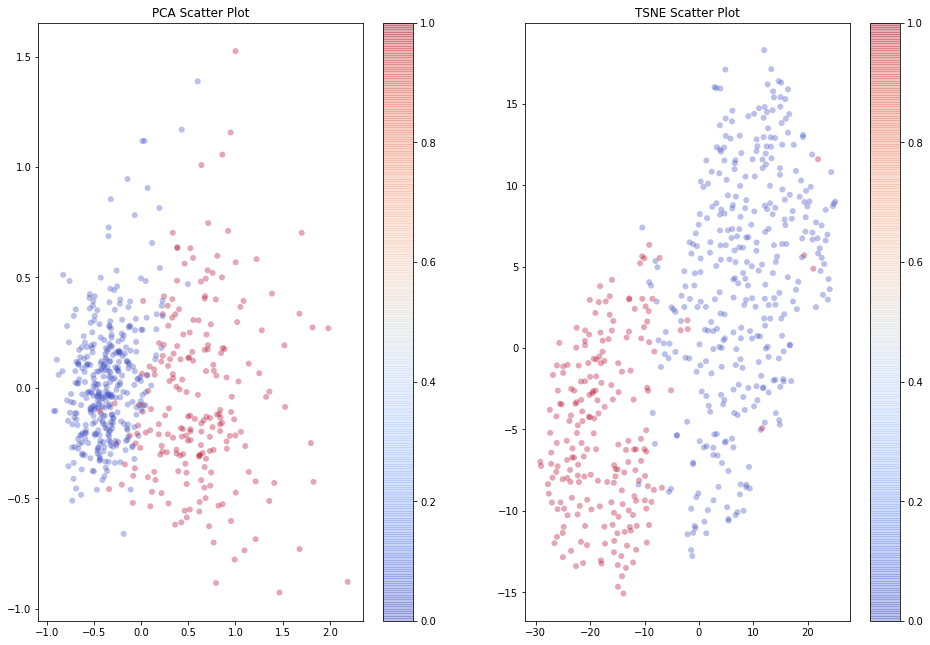

In [106]:
# Plot the TSNE and PCA visuals side-by-side
plt.figure(figsize = (16,11))
plt.subplot(121)
plt.scatter(pca_2d[:,0],pca_2d[:,1], c = y, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot')
plt.subplot(122)
plt.scatter(tsne_results[:,0],tsne_results[:,1],  c = y, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show()

### Visualizing the PCA and TNSE Plots for the Raw Dataset: X_Train Dataset

In [107]:
## Using the X_Train Dataset 

# Turn dataframe into arrays
X = X_train.values

# Invoke the PCA method. Since this is a binary classification problem
# let's call n_components = 2
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X)

# Invoke the TSNE method
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 33.679705
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.810886
[t-SNE] KL divergence after 2000 iterations: 0.215411


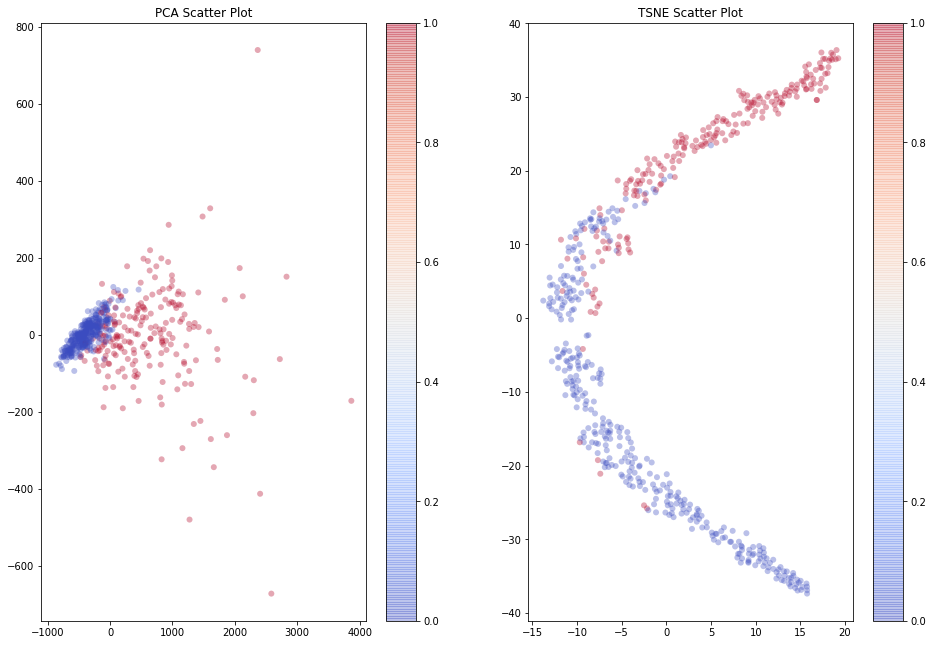

In [108]:
## Using the Y: Target Variable to Plot the TSNE and PCA Visuals side-by-side

plt.figure(figsize = (16,11))
plt.subplot(121)
plt.scatter(pca_2d[:,0],pca_2d[:,1], c = y, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot')
plt.subplot(122)
plt.scatter(tsne_results[:,0],tsne_results[:,1],  c =y, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show()

As one can see from these high-level plots, even though PCA does quite a decent job of visualising our two target clusters ( M for Malignant and B for Benign - cheating a bit here with the labels), the visuals in TSNE is much more obvious in terms of the demarcation in the target.

t-SNE gives a better representation in the meaning of visualization. But for dimension reduction Pca is better.

Shows that Non-Linear Methods are much better than Linear Methods

In [120]:
from sklearn.decomposition import PCA
pca = PCA()
out = pca.fit_transform(normalized_data)
out.shape

(569, 30)

## Advanced Modelling  and Analysis

#### Encoding Categorical Data

In [121]:
# Encoding categorical data

from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

In [151]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error as mse

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline

## Pearson Correlation Coefficent 

librimind.com: 'Data columns with very similar trends are also likely to carry very similar information. In this case, only one of them will suffice to feed the machine learning model. Here we calculate the correlation coefficient between numerical and nominal columns as the Coefficient and the Pearson’s chi squar

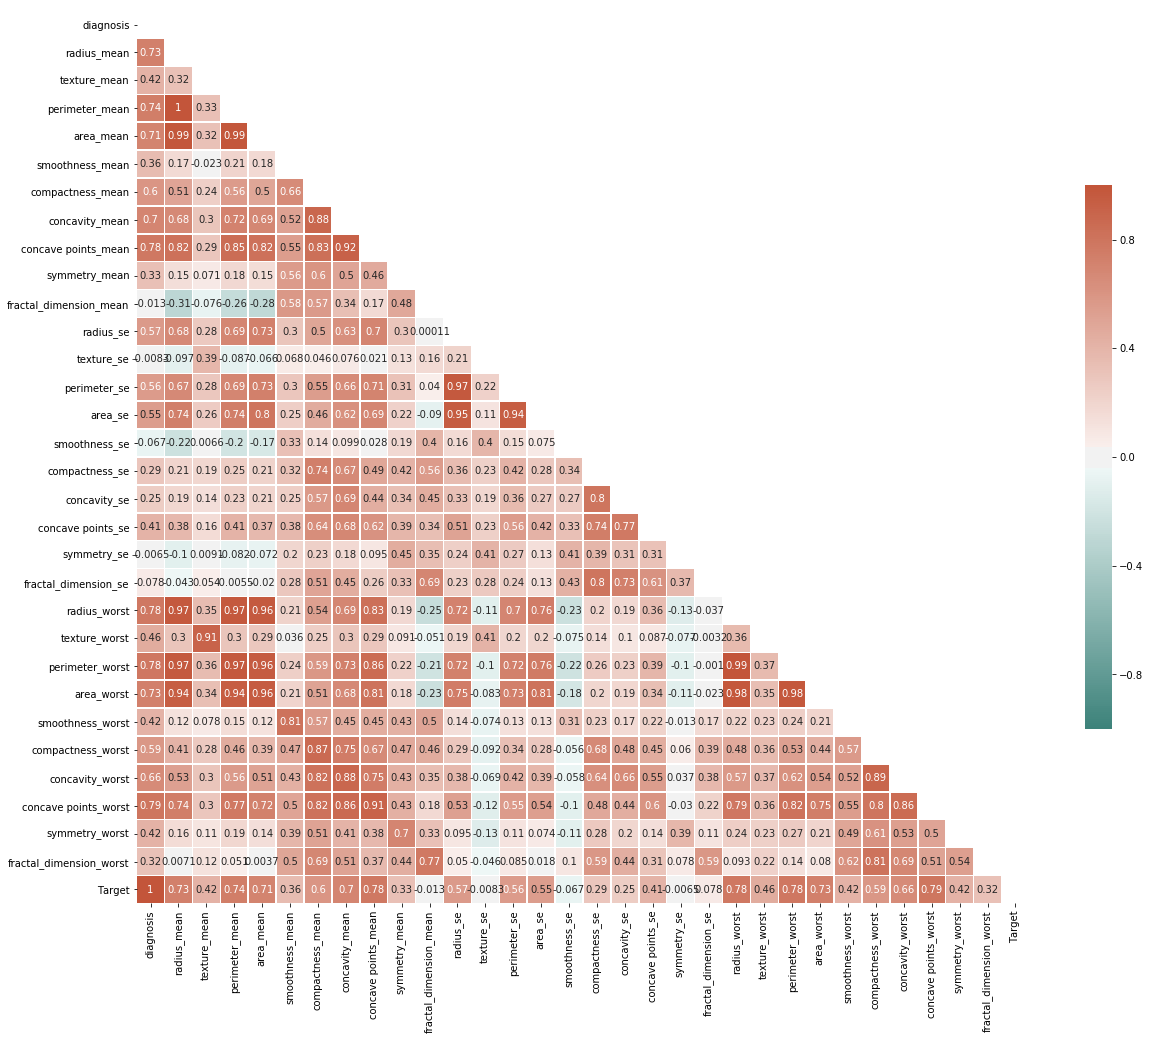

In [133]:
correlation = dataset.corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [134]:
from sklearn.decomposition import PCA

# observables = df.loc[:,observe]
observables = X_train.iloc[:,1:]
pca = PCA(n_components=3)
pca.fit(observables)

# Dimension indexing
dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

# Individual PCA Components
components = pd.DataFrame(np.round(pca.components_, 4), columns = observables.keys())
components.index = dimensions

# Explained variance in PCA
ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
variance_ratios.index = dimensions

print(pd.concat([variance_ratios, components], axis = 1))

             Explained Variance  texture_mean  perimeter_mean  area_mean  \
Dimension 1              0.9820        0.0022          0.0351     0.5168   
Dimension 2              0.0162       -0.0029          0.0627     0.8519   
Dimension 3              0.0016       -0.0064         -0.0717    -0.0280   

             smoothness_mean  compactness_mean  concavity_mean  \
Dimension 1           0.0000            0.0000          0.0001   
Dimension 2          -0.0000           -0.0000          0.0001   
Dimension 3           0.0001            0.0001          0.0003   

             concave points_mean  symmetry_mean  fractal_dimension_mean  ...  \
Dimension 1                  0.0         0.0000                 -0.0000  ...   
Dimension 2                  0.0        -0.0000                 -0.0000  ...   
Dimension 3                  0.0         0.0001                  0.0001  ...   

             radius_worst  texture_worst  perimeter_worst  area_worst  \
Dimension 1        0.0072         0.

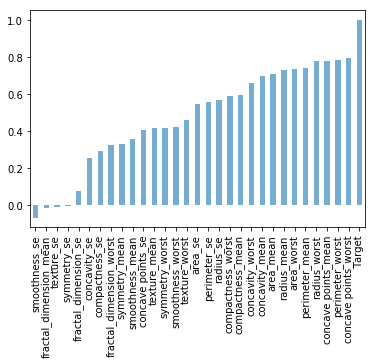

In [136]:
# Observe correlation to the diagnosis
tst = dataset.corr()['diagnosis'].copy()
tst = tst.drop('diagnosis')
tst.sort_values(inplace=True)
tst.plot(kind='bar', alpha=0.6)

## Data Analysis 

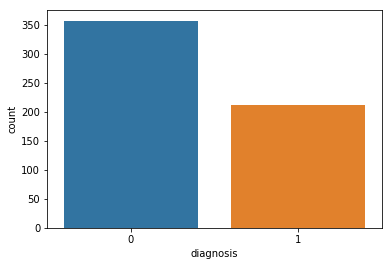

In [145]:
sns.countplot(dataset['diagnosis'])

The data contains 357 benign and 212 malignant cell nuclei. This means that approximately 1 out of 3 cell nuclei in the dataset is malignant. This should be more than enough to train our models.

Now let's take a look at some of the differences in the data between benign and malignant cell nuclei, starting with radius and texture.

The mean radius and texture of malignant cell nuclei are significantly higher than those of the benign cell nuclei. So, these are clear indications of cell nuclei being malignant.

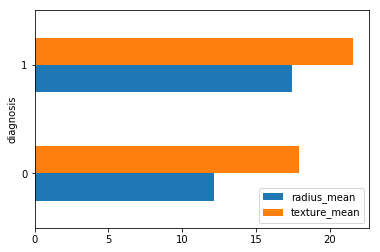

In [137]:
dataset.groupby(['diagnosis']).mean()[['radius_mean', 'texture_mean', ]].plot.barh()

The mean of the perimeter also shows a significant increase when a cell nucleus is malignant. Another clear indication

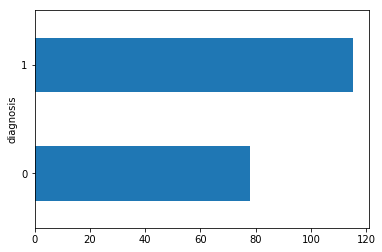

In [138]:
dataset.groupby(['diagnosis']).mean()['perimeter_mean'].plot.barh()

Looking at the remaining data we can see this trend continuing for every data point except fractal dimension. The mean of the concavity and concave points in a malignant cell nucleus are more than triple the mean of a benign cell nucleus!

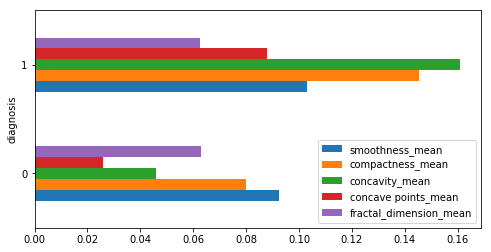

In [139]:
dataset.groupby(['diagnosis']).mean()[['smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'fractal_dimension_mean' ]].plot.barh(figsize = (8,4))

When we take a closer look at the fractal dimension of a cell nucleus, we can see that while the mean doesn't differ much between benign and malignant cell nuclei the worst values of malignant cell nuclei are higher than those of benign cell nuclei.

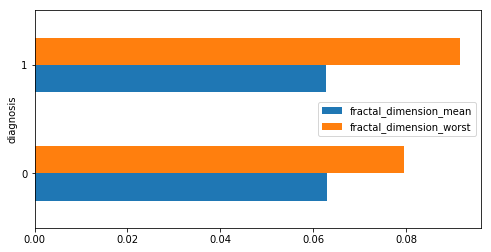

In [149]:
dataset.groupby(['diagnosis']).mean()[['fractal_dimension_mean', 'fractal_dimension_worst',  ]].plot.barh(figsize = (8,4))

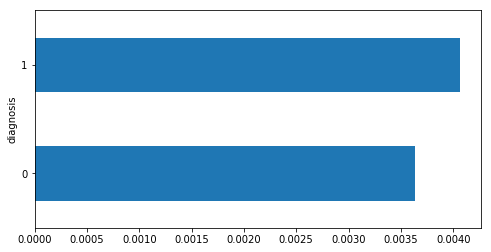

In [148]:
dataset.groupby(['diagnosis']).mean()['fractal_dimension_se'].plot.barh(figsize = (8,4))

The standard deviation of the fractal dimensions of a malignant cell nucleus are also higher, though not as significantly as some other values.

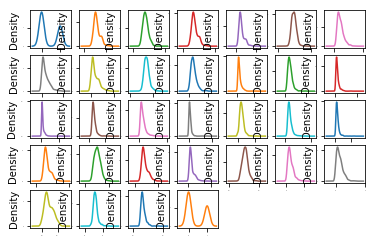

In [178]:
dataset.plot(kind='density', subplots=True, layout=(5,7), sharex=False, legend=False, fontsize=1)
plt.show()

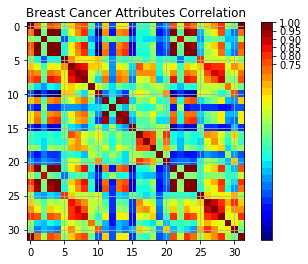

In [179]:
from matplotlib import cm as cm

fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(dataset.corr(), interpolation="none", cmap=cmap)
ax1.grid(True)
plt.title('Breast Cancer Attributes Correlation')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
plt.show()

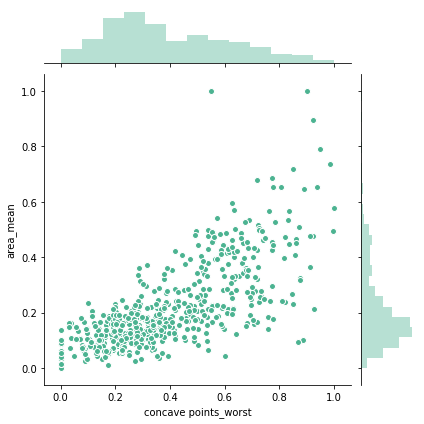

In [180]:
sns.jointplot(x = normalized_data['concave points_worst'], y = normalized_data['area_mean'], stat_func=None, color="#4CB391", edgecolor = 'w', size = 6);

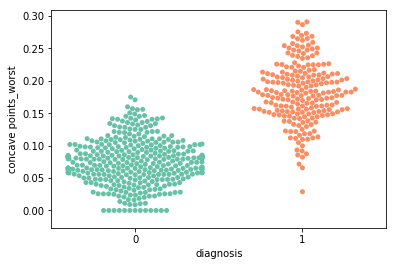

In [181]:
sns.swarmplot(x = 'diagnosis', y = 'concave points_worst',palette = 'Set2', data =dataset);

In [165]:
from sklearn import ensemble, linear_model, svm, neighbors, gaussian_process, naive_bayes, tree 

scoreFrame = pd.DataFrame(columns = ['Algorithm Name', 'Average', 'Standard Deviation'])

algList=[
    #linear
    linear_model.Ridge(random_state=0),
    linear_model.SGDClassifier(random_state=0),
    #Neighbors
    neighbors.KNeighborsClassifier(),
    #SVM
    svm.SVC(),
    #Gaussian Process
    gaussian_process.GaussianProcessClassifier(random_state=0),
    #Naive Bayes
    naive_bayes.GaussianNB(),
    #Tree
    tree.DecisionTreeClassifier(random_state=0),
    #Ensemble
    ensemble.GradientBoostingClassifier(random_state=0),
    ensemble.RandomForestClassifier(random_state=0),
    ensemble.ExtraTreesClassifier(random_state=0),
    ensemble.AdaBoostClassifier(random_state=0)
]

In [166]:
from sklearn.model_selection import cross_val_score

for alg in algList:
    scores = cross_val_score(alg, X, y, cv = 10)
    algName = alg.__class__.__name__
    scoreAverage = scores.mean()
    scoreSTD = scores.std() * 2
    scoreFrame.loc[len(scoreFrame)] = [algName, scoreAverage, scoreSTD]

In [167]:
scoreFrame.sort_values('Average', ascending=False)

,Algorithm Name,Average,Standard Deviation
7,GradientBoostingClassifier,0.961491,0.050981
10,AdaBoostClassifier,0.959612,0.035450
9,ExtraTreesClassifier,0.954471,0.051580
8,RandomForestClassifier,0.954410,0.038410
5,GaussianNB,0.938680,0.060226
2,KNeighborsClassifier,0.929843,0.057842
6,DecisionTreeClassifier,0.917563,0.065195
1,SGDClassifier,0.891242,0.064737
4,GaussianProcessClassifier,0.750654,0.076641
0,Ridge,0.667509,0.237413


### Checking the Distribution of the Target Variable

No handles with labels found to put in legend.


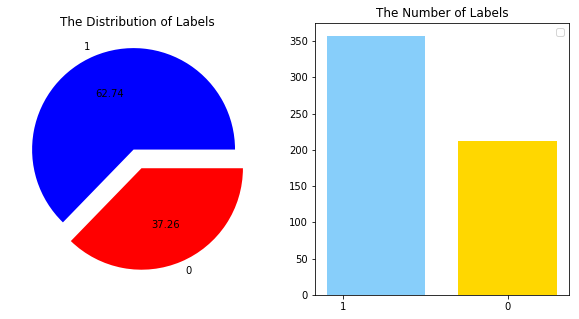

In [185]:
# To check the distribution of the Diagnosis Feature 

label = dataset[ 'diagnosis' ]
plt.figure( figsize=[10,5] )
plt.subplot(121)
plt.pie( x= label.value_counts(),labels=label.unique(),colors=['b','r'],explode=[0.1,0.1],autopct='%.2f' )
plt.title( 'The Distribution of Labels' )
plt.subplot(122)
plt.bar( x = [ 0.2,1 ],height =label.value_counts() ,width=0.6,color=['lightskyblue','gold'] )
plt.xticks( range(2),label.unique() )
plt.title( 'The Number of Labels' )
plt.legend()
plt.show()

### VisuaLizing the Distribution of Different Labels

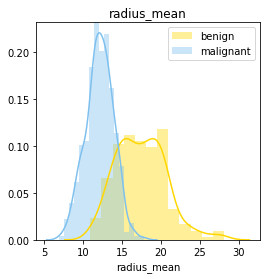

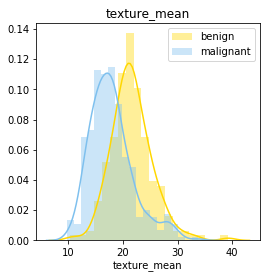

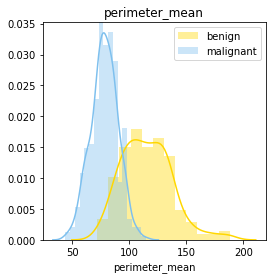

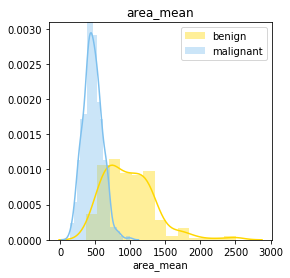

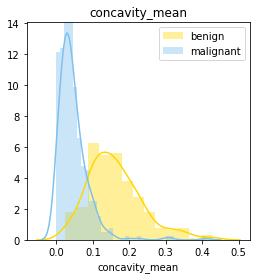

In [190]:
# To visualize the distribution of the different labels


B = dataset[ dataset['diagnosis']==1 ]
M = dataset[ dataset['diagnosis']==0 ]

import seaborn as sns

def plot_distribution ( feature ):
    global B
    global M
    b = B[feature]
    m = M[feature]
    group_labels = ['benign','malignant']
    colors = ['#FFD700', '#7EC0EE']
    plt.figure( figsize=[4,4] )
    sns.distplot( b,color=colors[0],label=group_labels[0] )
    sns.distplot( m,color=colors[1],label=group_labels[1] )
    plt.title(feature)
    plt.legend(  )
    plt.show()

plot_distribution('radius_mean')
plot_distribution('texture_mean')
plot_distribution('perimeter_mean')
plot_distribution('area_mean')
plot_distribution('concavity_mean')

## Visualizing Missing Values

In [192]:
null_count = dataset.isnull().sum()
percentage = null_count / len(dataset) *100

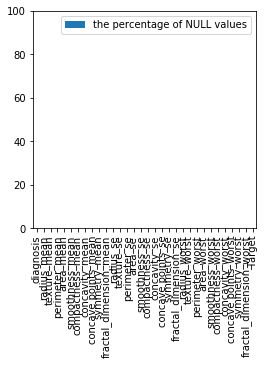

In [193]:
# to plot the percentage of empty data
import matplotlib.pyplot as plt
plt.figure( figsize=(4,4) )
percentage.plot( kind='bar',label='the percentage of NULL values' )
plt.ylim(0.0,100.0)
plt.legend()
plt.show( )

### Visualizing the Positive Relationships Between Other Features

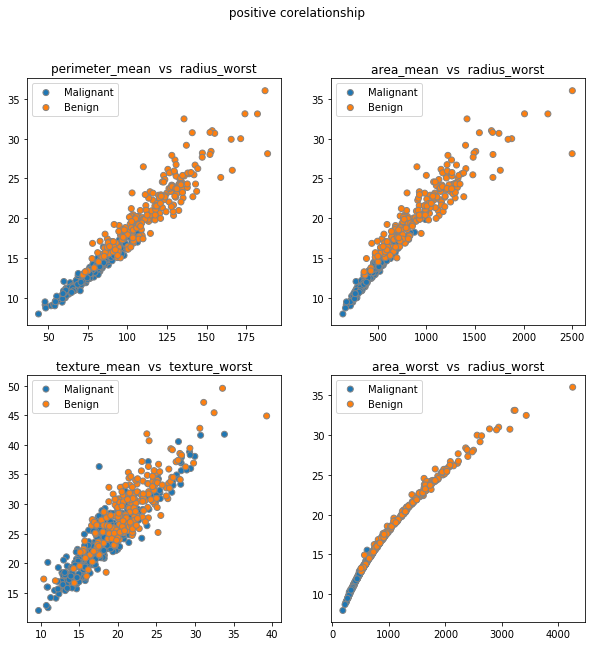

In [194]:
# to visualize the positive relationships between other features

def plot_fvfin_malignant ( feature1,feature2 ):
    global M
    global B
    x_m = M[feature1]
    y_m = M[feature2]
    x_b = B[feature1]
    y_b = B[feature2]

    plt.scatter( x=x_m, y=y_m,edgecolors=['#848484','#848484'] )
    plt.scatter( x=x_b, y=y_b,edgecolors=['#848484','#848484'] )
    plt.title( feature1+'  vs  '+feature2 )
    plt.legend( [ 'Malignant','Benign' ] )
    #plt.imshow()


plt.figure( figsize=[10,10] )
plt.subplot( 221 )
plot_fvfin_malignant('perimeter_mean','radius_worst')
plt.subplot( 222 )
plot_fvfin_malignant('area_mean','radius_worst')
plt.subplot( 223 )
plot_fvfin_malignant('texture_mean','texture_worst')
plt.subplot( 224 )
plot_fvfin_malignant('area_worst','radius_worst')
#plt.legend(  )
plt.suptitle(' positive corelationship ')
plt.show( )

## Visualizing the Negative Relationship Between Features

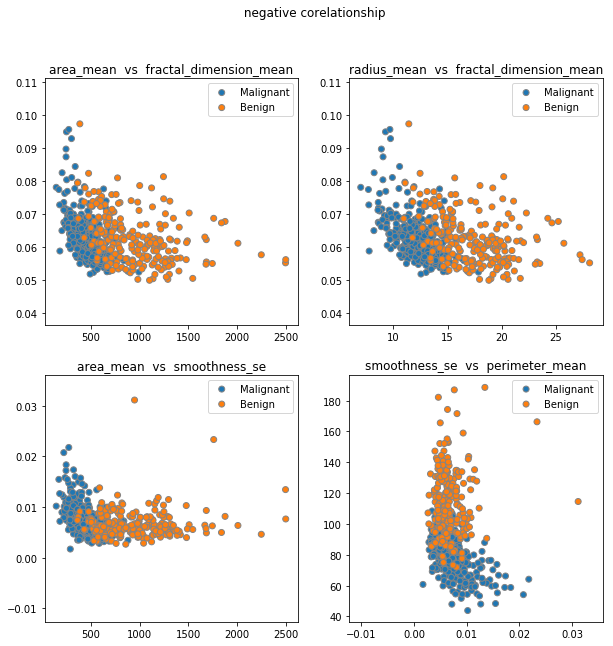

In [195]:
# to visualize the negative relationships between features


plt.figure( figsize=[10,10] )
plt.subplot( 221 )
plot_fvfin_malignant('area_mean','fractal_dimension_mean')
plt.subplot( 222 )
plot_fvfin_malignant('radius_mean','fractal_dimension_mean')
plt.subplot( 223 )
plot_fvfin_malignant('area_mean','smoothness_se')
plt.subplot( 224 )
plot_fvfin_malignant('smoothness_se','perimeter_mean')
#plt.legend(  )
plt.suptitle(' negative corelationship ')
plt.show( )